In [47]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

def warn (*args, **kwargs):
    pass

warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("display.max_columns", None)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
X_train_sin_outliers = pd.read_excel("//workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_test_sin_outliers.xlsx")
X_train_con_outliers = pd.read_excel("/workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_train_con_outliers.xlsx")
X_train_sin_outliers = pd.read_excel("/workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_train_sin_outliers.xlsx")
X_test_con_outliers = pd.read_excel("//workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/X_test_con_outliers.xlsx")
y_train = pd.read_excel("/workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/y_train.xlsx")
y_test = pd.read_excel("//workspaces/Tulio-Gimenez-Tutorial-del-Proyecto-Arbol-de-Decision/data/processed/y_test.xlsx")

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []
#results = []
models = []
for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    
]:

    model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy_score(y_train, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [0.8094462540716613, 0.6758957654723127]
Mejor Accuracy: 0.8094462540716613


In [49]:
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion="entropy",
    max_features=None,
    random_state=42
)
model.fit(X_train_con_outliers, y_train)
y_pred_test = model.predict(X_test_con_outliers)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)

Accuracy en test: 0.7727272727272727


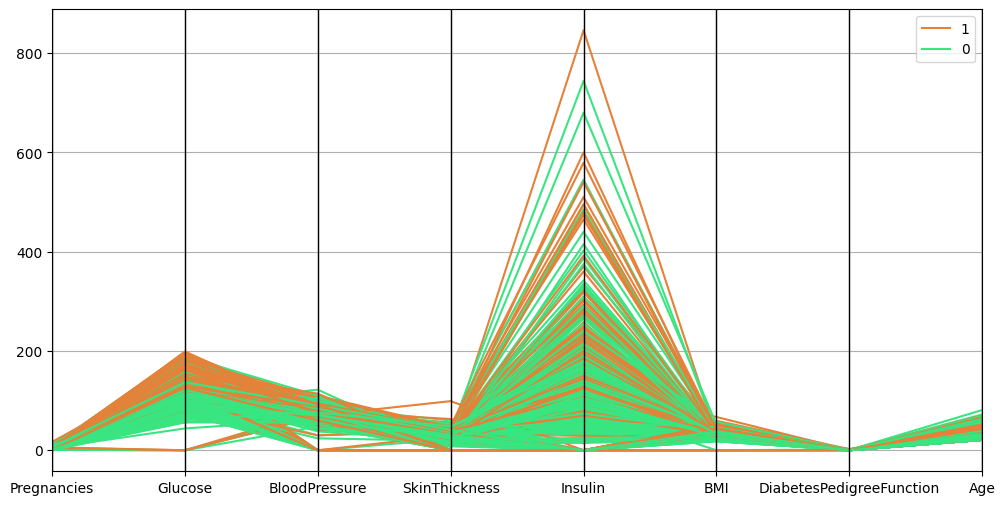

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_con_outliers, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


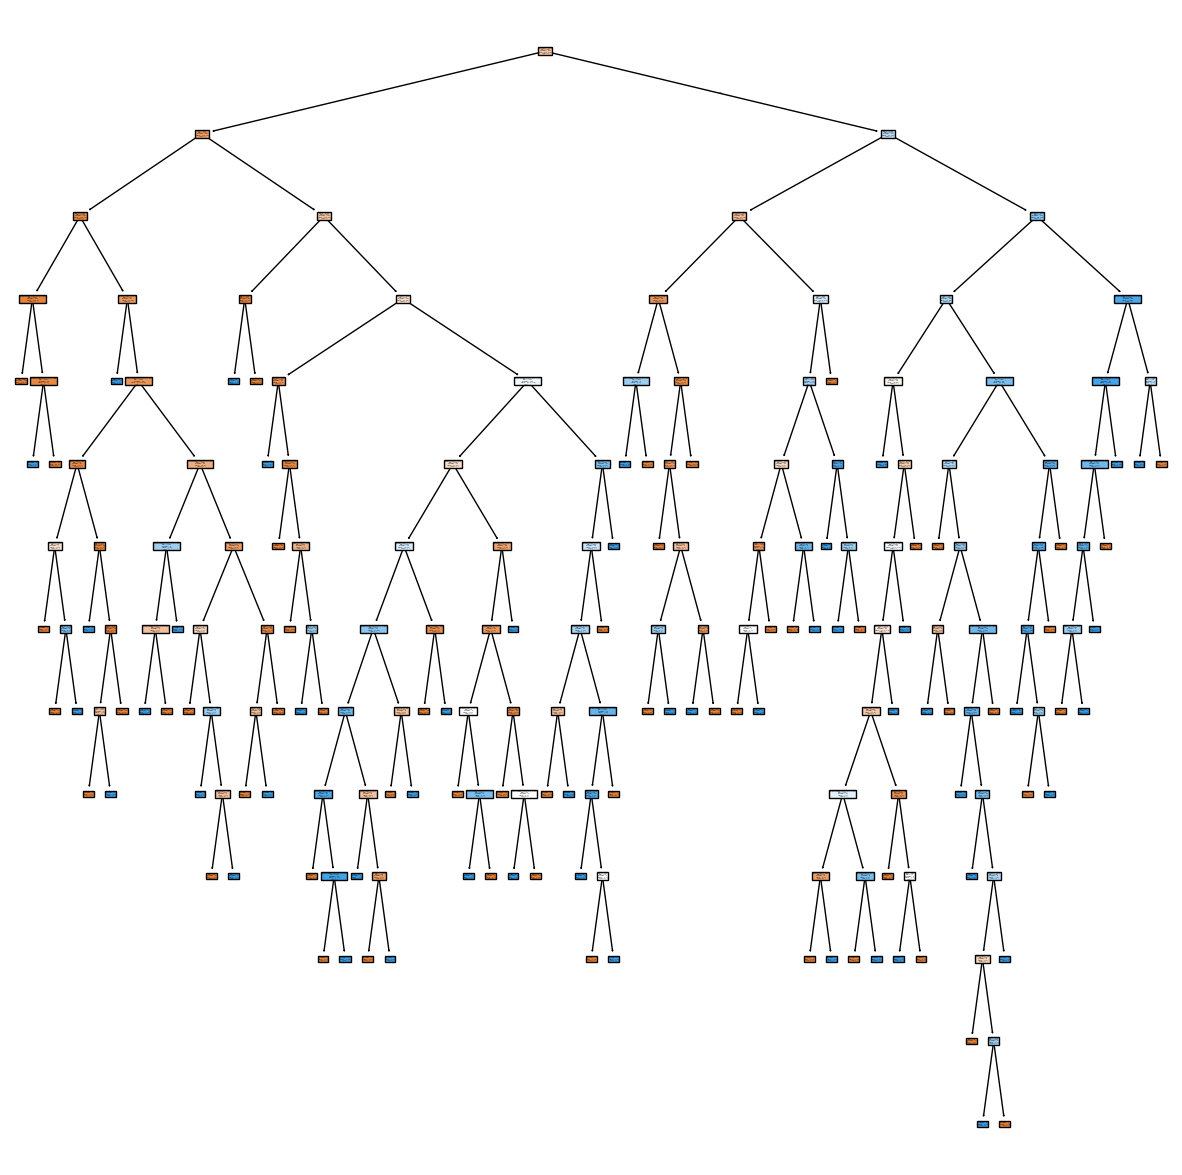

In [52]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [53]:
plt.savefig("../models/arbol_decision.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

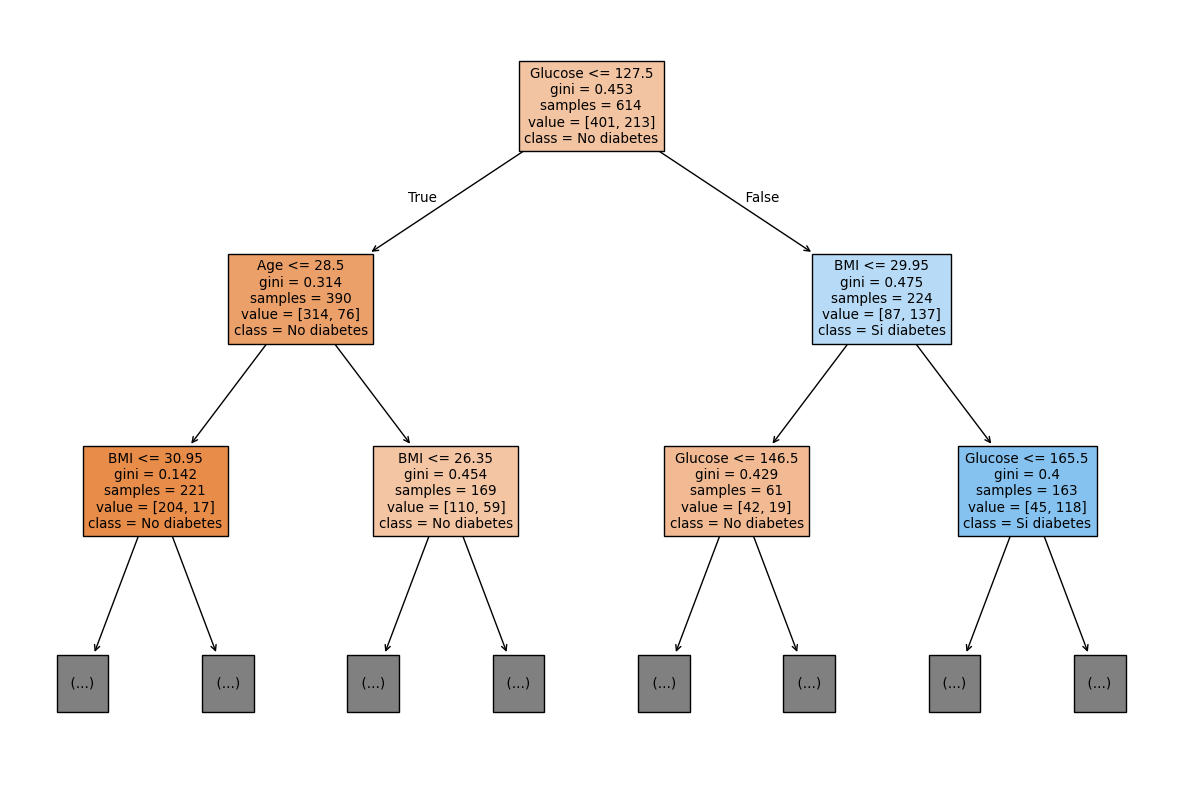

In [54]:
from sklearn import tree

fig = plt.figure(figsize=(15, 10))  

tree.plot_tree(
    model,
    feature_names=list(X_train_con_outliers.columns),
    class_names=["No diabetes", "Si diabetes"],
    filled=True,
    max_depth=2  #Prueba con todas las características
)

plt.show()

In [55]:
plt.savefig("../models/arbol_decision_reducido.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [56]:
from pickle import dump

dump(models, open("../models/decision_tree_classifier_default_42.sav", "wb"))